# <img src="../images/emergency.png" width="40" height="40"> **코드 실습 시간** 

In [1]:
# 필요한 라이브러리 가져오기

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False

#### **Step 1. 데이터 불러오기**

In [2]:
data_test2 = pd.read_csv('../data/superconductivty.csv')

print("\n데이터 셋의 일부를 확인해보면 아래와 같습니다.")
data_test2.head()


데이터 셋의 일부를 확인해보면 아래와 같습니다.


number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

<html> <b><font size=4>* 변수에 대한 설명</font></b><br><br>
- Atomic Mass (원자 질량): 양성자와 중성자의 정지 질량의 합.<br>
- First Ionization Energy (첫 이온화 에너지): 원자가 전자를 제거하는 데 필요한 에너지.<br>
- Atomic Radius (원자 반지름): 계산된 원자 반지름.<br>
- Density (밀도): 표준 온도와 압력에서의 밀도.<br>
- Electron Affinity (전자 친화도): 중성 원자에 전자를 추가하는 데 필요한 에너지.<br>
- Fusion Heat (융해 열): 온도 변화 없이 고체에서 액체로 변하는 데 필요한 에너지.<br>
- Thermal Conductivity (열 전도율): 열 전도율 계수 κ.<br>
- Valence (원자가): 원소가 형성하는 화학 결합의 일반적인 수.<br>

</html>

#### **Step 2. 데이터 전처리**
- 데이터 결측치 확인

In [3]:
# 데이터 결측치를 확인하는 코드를 작성해주세요.
data_test2.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

- 데이터 중복 확인

In [4]:
# 데이터의 중복을 확인하는 코드를 작성해주세요.
data_test2.duplicated().sum()

np.int64(66)

- 중복 데이터를 제거

In [5]:
# 중복 데이터가 있다면 중복 데이터를 제거하는 코드를 작성해주세요.
data_test2=data_test2.copy()
data_test2.drop_duplicates(subset=None,inplace=True)

#### **Step 3. 데이터 분리**

In [6]:
# 학습 데이터와 테스트 데이터로 데이터를 나누는 코드를 작성해주세요.
# 예측 target 값은 'critical_temp' 컬럼 입니다.

X_test = data_test2.drop('critical_temp', axis=1)
y_test = data_test2['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

print("\n학습 세트 크기:", X_train.shape[0])
print("테스트 세트 크기:", X_test.shape[0])


학습 세트 크기: 16957
테스트 세트 크기: 4240


#### **Step 4. 모델 구축**

In [7]:
lm = sm.OLS(y_train, X_train)
results = lm.fit()

In [8]:
# LinearRegression를 사용하여 모델을 구축하는 코드를 작성해주세요.
model = LinearRegression()
model.fit(X_train, y_train)

print("\n모델 계수(기울기):", model.coef_[0])
print("모델 절편(y절편):", model.intercept_)


모델 계수(기울기): -3.679181152736899
모델 절편(y절편): -19.427061499439645


#### **Step 5. 모델 예측 수행**

In [9]:
# 모델 예측을 수행하는 코드를 작성해주세요.

y_pred = model.predict(X_test)

#### **Step 6. 모델 평가**
- MAE, MSE, R2 값을 비교하여 모델을 평가

In [10]:
# 위 3가지의 평가지표를 사용해 모델을 평가하는 코드를 작성해주세요.

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n[모델 평가 지표]")
print("\n- 평균 절대 오차 (MAE):", mae)
print("- 평균 제곱 오차 (MSE):", mse)
print("- R-제곱 (R2) 값:", r2)


[모델 평가 지표]

- 평균 절대 오차 (MAE): 13.603609886152821
- 평균 제곱 오차 (MSE): 317.90932475376667
- R-제곱 (R2) 값: 0.7340196309461701


***

#### **correlation 확인**

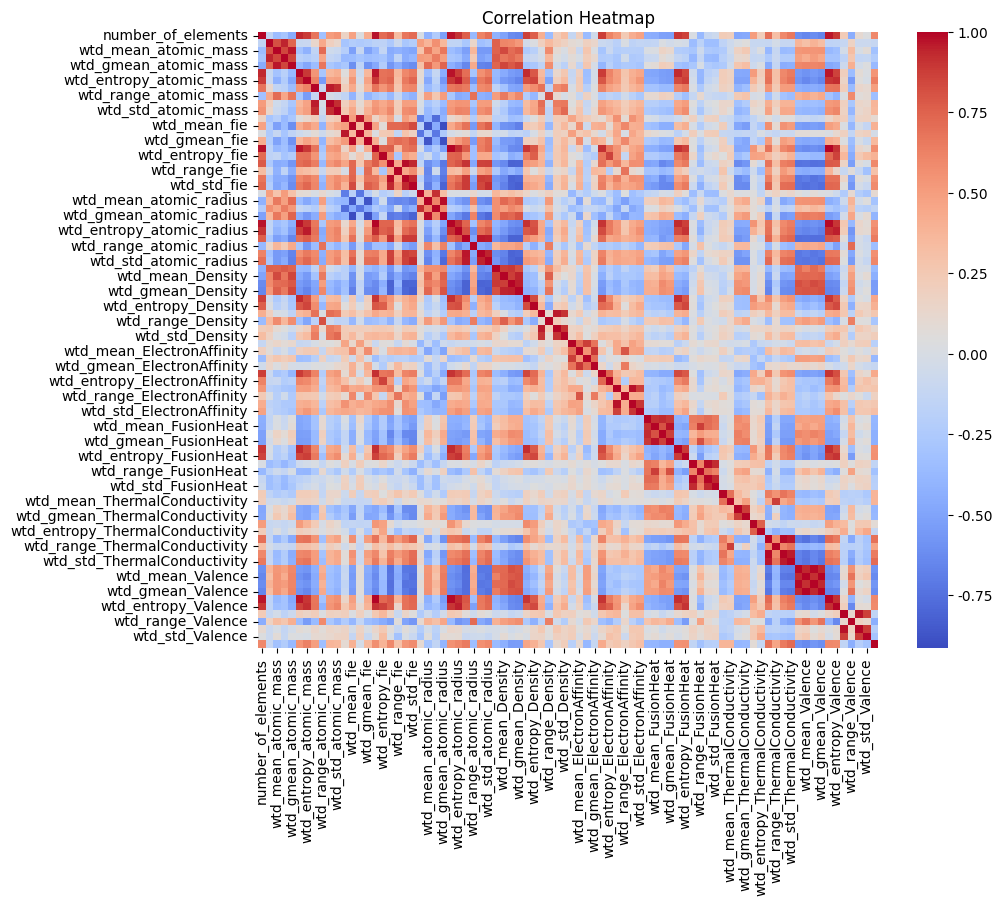

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_test2.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

## <img src="../images/book.png" width="40" height="40"> **이론 퀴즈** 

#### <span style="color: #ffd33d">**문제 1. 단순선형회귀모델의 기본 가정 중 올바른 것은 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 독립 변수는 반드시 정규 분포를 따라야 한다.<br>
&emsp; &#9313; 잔차는 독립적이어야 한다.<br>
&emsp; &#9314; 종속 변수는 항상 정규 분포를 따라야 한다.<br>
&emsp; &#9315; 독립 변수와 종속 변수는 반드시 상관관계를 가져야 한다.

**정답 작성** : 2, 4

#### <span style="color: #ffd33d">**문제 2. 단순선형회귀의 회귀선에 대한 설명으로 올바른 것은 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 회귀선은 항상 모든 데이터 포인트를 포함해야 한다.<br>
&emsp; &#9313; 회귀선은 독립 변수와 종속 변수 간의 선형 관계를 나타낸다.<br>
&emsp; &#9314; 회귀선은 최소절대값법에 의해 추정된다.<br>
&emsp; &#9315; 회귀선은 데이터의 평균과 일치해야 한다.<br>

**정답 작성** : 2

#### <span style="color: #ffd33d">**문제 3. 단순선형회귀분석에서 결정계수 ($R^2$)에 대한 설명으로 올바른 것은 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; $R^2$ 값이 음수일 수도 있다.<br>
&emsp; &#9313; $R^2$ 값이 낮을수록 모델이 데이터를 잘 설명한다.<br>
&emsp; &#9314; $R^2$ 값은 항상 0과 1 사이의 값을 가진다.<br>
&emsp; &#9315; $R^2$ 값이 0이면 모델이 데이터를 완벽히 설명한다.

**정답 작성** : 1

#### <span style="color: #ffd33d">**문제 4. 단변량 회귀 모델에서 정규성 가정이란 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 종속 변수의 분포가 정규 분포를 따른다.  
&emsp; &#9313; 오차성분의 분포가 정규 분포를 따른다.  
&emsp; &#9314; 독립변수가 정규 분포를 따른다.  
&emsp; &#9315; 예측값의 분포가 정규 분포를 따른다.  

**정답 작성** : 2

#### <span style="color: #ffd33d">**문제 5. 단순선형회귀분석에서 기울기 b1에 대한 p-value가 0.02일 때, 이 p-value는 어떤 의미를 가질까요? (단, alpha=0.05)**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 귀무가설을 기각하지 않음  
&emsp; &#9313; 귀무가설을 받아들임  
&emsp; &#9314; 귀무가설을 기각함  
&emsp; &#9315; 판단할 수 없음  

**정답 작성** : 3

#### <span style="color: #ffd33d">**문제 6. 정규화(Regularization)의 목적은 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 모델의 과적합을 방지한다. <br>
&emsp; &#9313; 회귀계수의 크기를 조정한다. <br>
&emsp; &#9314; 독립 변수 간의 다중공선성을 완화한다. <br>
&emsp; &#9315; 오차의 제곱합을 최소화한다.

**정답 작성** : 1, 2, 3

#### <span style="color: #ffd33d">**문제 7. Ridge와 Lasso의 차이점은 무엇인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; Ridge는 계수의 절대값 합을 제한한다. <br>
&emsp; &#9313; Lasso는 계수의 절대값 합을 제한한다.<br>
&emsp; &#9314; Ridge는 변수를 선택하는 기능이 없다.<br>
&emsp; &#9315; Lasso는 일부 계수를 0으로 만들어 변수 선택을 수행한다.

**정답 작성** : 2, 3, 4

#### <span style="color: #ffd33d">**문제 8. 단순선형회귀분석에서 기울기 b1 값이 15일 때, x가 1 증가할 때 y에 끼치는 영향은 어떤 의미인가요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; x가 1 증가할 때마다 y가 15 감소함  
&emsp; &#9313; x가 1 증가할 때마다 y가 15 증가함  
&emsp; &#9314; x가 1 증가할 때마다 y는 아무런 변화가 없음  
&emsp; &#9315; x가 1 증가할 때마다 y가 1 증가함  

**정답 작성** : 2

#### <span style="color: #ffd33d">**문제 9. 잔차가 자기상관성을 가지는 경우, 어떤 가정이 위배되나요?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 등분산성 가정  
&emsp; &#9313; 정규성 가정  
&emsp; &#9314; 독립성 가정  
&emsp; &#9315; 선형성 가정  

**정답 작성** : 3

#### <span style="color: #ffd33d">**문제 10. 다중공선성 문제를 해겨랗기 위한 방법으로 옳지 않은 것은?**</span>
<span style="color:gray">*해당 사항을 모두 고르시오.*</span>

&emsp; &#9312; 불필요한 중복 설명력 변수 제거  
&emsp; &#9313; Shrinkage model 회귀모형 구축  
&emsp; &#9314; 주성분 분석  
&emsp; &#9315; 독립 변수의 표준화

**정답 작성** : 4